# Importing Data


In [3]:
import pandas as pd
import numpy as np

In [6]:
# File uses different encoding such as ISO-8859-1
df= pd.read_csv("D:/Desktop/Data_Analyst/Online Retail/Online_Retail.csv", encoding='ISO-8859-1')

# Exploring Data

In [7]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [9]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [12]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


# Data Cleaning


In [17]:
# Check the number of duplicate rows
duplicates_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates_count}")

# Remove duplicate rows and update the DataFrame
df = df.drop_duplicates()

# Verify if duplicates are removed
duplicates_count_after = df.duplicated().sum()
print(f"Number of duplicate rows after removal: {duplicates_count_after}")


Number of duplicate rows: 5268
Number of duplicate rows after removal: 0


In [18]:
df.duplicated().sum()

0

In [25]:
# Remove rows where the Description column is empty or null
df = df[df['Description'].notnull() & (df['Description'] != '')]

# Remove rows where the customerid isnull
df = df[df['CustomerID'].notnull() & (df['CustomerID'] != '')]

df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

# Data Visualization 

C:\Users\User\AppData\Local\Temp\ipykernel_3124\4093244592.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_customers.values, y=top_10_customers.index, palette="viridis")


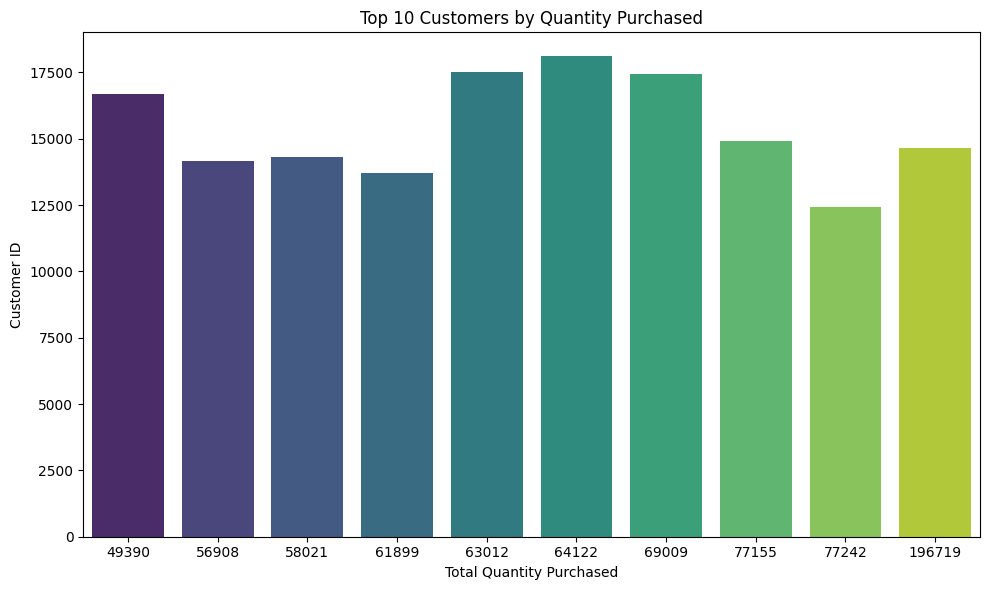

In [26]:
# To check which customer purchased the most
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

customer_purchases = df.groupby('CustomerID')['Quantity'].sum()
top_10_customers = customer_purchases.sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_customers.values, y=top_10_customers.index, palette="viridis")
plt.xlabel('Total Quantity Purchased')
plt.ylabel('Customer ID')
plt.title('Top 10 Customers by Quantity Purchased')
plt.tight_layout()
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_3124\2520909924.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_products.values, y=top_10_products.index, palette="magma")


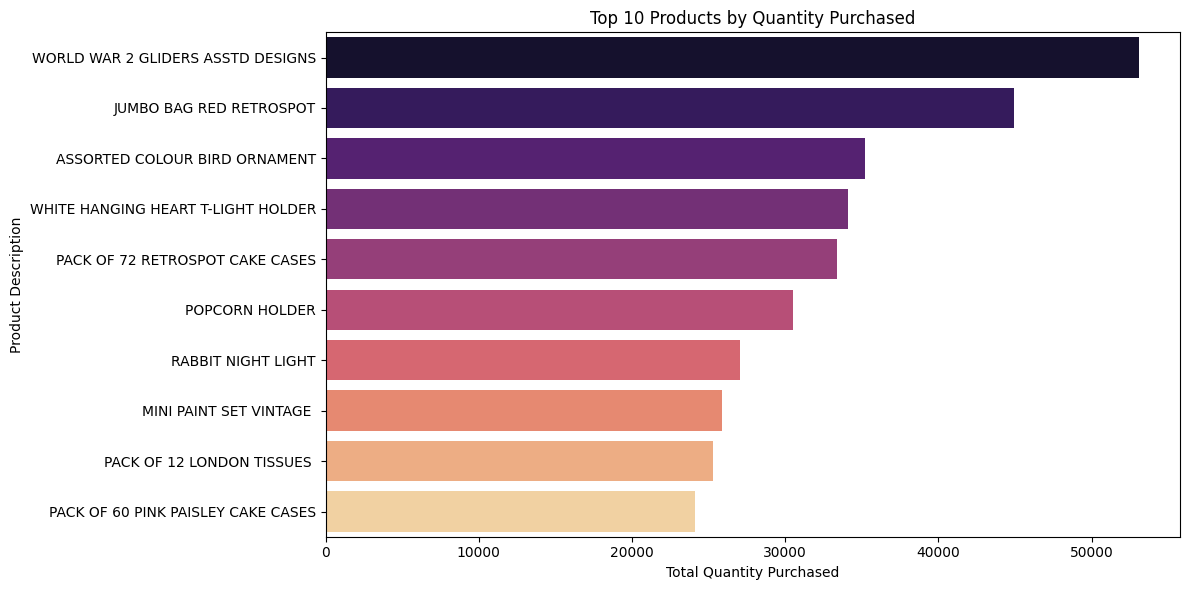

In [27]:
# Top 10 products sold by quantity
product_purchases = df.groupby('Description')['Quantity'].sum()
top_10_products = product_purchases.sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_products.values, y=top_10_products.index, palette="magma")
plt.xlabel('Total Quantity Purchased')
plt.ylabel('Product Description')
plt.title('Top 10 Products by Quantity Purchased')
plt.tight_layout()
plt.show()


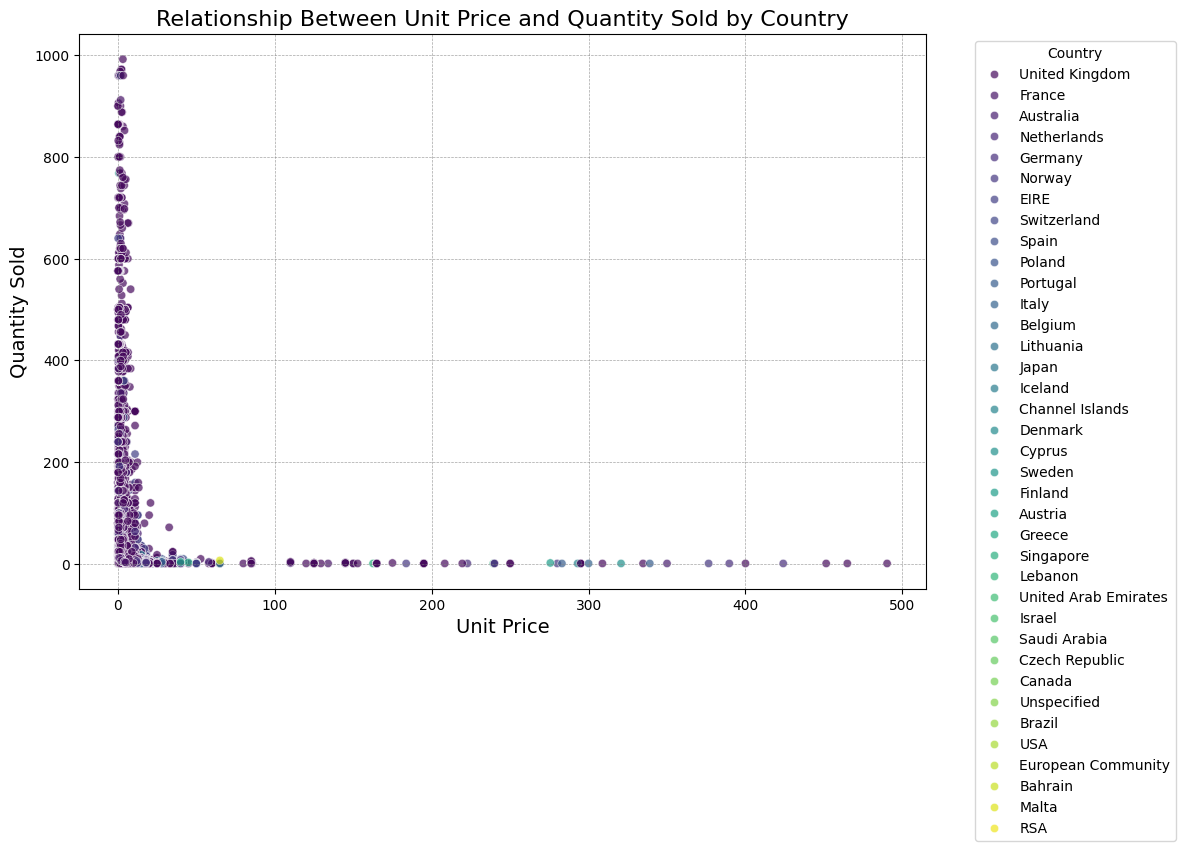

In [ ]:
# To check the relationship between UnitPrice and the number of quantity customer purchased in Each country

# Filter out outliers for better visualization
df_filtered = df[(df['UnitPrice'] > 0) & (df['Quantity'] > 0) & (df['Quantity'] < 1000) & (df['UnitPrice'] < 500)]

# Scatter Plot
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_filtered, x='UnitPrice', y='Quantity', hue='Country', alpha=0.7, palette='viridis')

# labels and title
plt.xlabel('Unit Price', fontsize=14)
plt.ylabel('Quantity Sold', fontsize=14)
plt.title('Relationship Between Unit Price and Quantity Sold by Country', fontsize=16)

# Grid for better readability
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# Customize legend
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()


# Exploratory Data Analysis (EDA)
1. Data set Overview
    - Dataset contains 541,909 rows and 8 columns.
    - 5,268 duplicate rows were identified and then removed for better analysis

2. Customer Analysis
    - CustomerID 64122 has the highes quantity purchased with 17,700 items.
    - Top 10 customers by quantity purchased contributes significantly to overall sales.

3. Product Analysis
    - Increasing top 10 products can be helpful in growth of overall sales.

5. Visualization
    - Lesser the price more customer is likely to purchase.
    - Most customer purchases from the retails are from United Kingdom and are valuable customer.
    - Top 10 products purchased by the customer accounts for significant portion of sales, which highlights customer prefernces.

6. Insights
    - Popular products are primarily decorative and household goods.
    - Low price items dominate salec volume.
    - High repeat purchases from certain customers suggest their loyalto towards the retail.
    - Only few high priced purchases drive revenue.
